<center><img src="img/aism_logo.png" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Week 3 Challenge - Diabetes prediction

En este _challenge_ vas a poner en práctica todo lo que has aprendido hasta ahora sobre EDA y algoritmos de clasificación para intentar predecir si un paciente padece o no diabetes en base a una serie de demográficos e indicadores médicos.

Para ello vamos a usar el famoso conjunto de datos [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) que podéis encontrar en Kaggle.

Este conjunto de datos proviene originalmente del [National Institute of Diabetes and Digestive and Kidney Diseases](https://www.niddk.nih.gov) de los Estados Unidos.  A la hora de seleccionar las instancias que componen este conjunto de datos se han impuesto una serie de restricciones, siendo en este caso todos los pacientes mujeres de al menos 21 años y de herencia indígena pima.

Las columnas con las que vamos a trabajar son:
* `Pregnancies` - Número de embarazos previos
* `Glucose` - Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa
* `BloodPressure` - Presión arterial diastólica (mm de Hg)
* `SkinThickness` - Grosor del pliegue cutáneo del tríceps (mm)
* `Insulin` - Insulina sérica de 2 horas ($\mu$U/ml)
* `BMI` - Índice de masa corporal (peso en kg/(altura en m)^2)
* `DiabetesPedigreeFunction` - Función que puntúa la probabilidad de diabetes en función de los antecedentes familiares
* `Age` - Edad en años
* `Outcome` - Clase que debemos predecir (`0` - No tiene diabetes o `1` - Tiene diabetes)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

RANDOM_STATE = 0

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Crear un DataFrame llamado `data` a partir del CSV que contiene los datos de los pacientes. Muestra 10 instancias aleatorias para comprobar que se ha importado correctamente.**

In [3]:
# Importa el dataset
data=pd.read_csv("diabetes.csv")

In [4]:
# Muestra las 10 instancias aleatorias
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
683,4,125,80,0,0,32.3,0.536,27,1
579,2,197,70,99,0,34.7,0.575,62,1
407,0,101,62,0,0,21.9,0.336,25,0
142,2,108,52,26,63,32.5,0.318,22,0
496,5,110,68,0,0,26.0,0.292,30,0
136,0,100,70,26,50,30.8,0.597,21,0
278,5,114,74,0,0,24.9,0.744,57,0
537,0,57,60,0,0,21.7,0.735,67,0
502,6,0,68,41,0,39.0,0.727,41,1
12,10,139,80,0,0,27.1,1.441,57,0


**Muestra la información del conjunto de datos. ¿Hay valores nulos?**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> No hay valores nulos porque todos los valores aparecen con non-null

**Haz un recuento de la distribución de la variable que queremos predecir. Muéstrala en valores absolutos y en proporción. ¿Qué puedes decir de este conjunto de datos?**

In [6]:
# En valores absolutos
data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# En proporción
data['Outcome'].value_counts(normalize=True)


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [8]:
#hay una gran diferencia entre diabeticos y no diabeticos en proporción

**Imprime el resumen estadístico de las variables numéricas del dataset. ¿Observas algo extraño?**

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> No se puede tener una glucosa, ni presion sanguinera, ni pliegue cutaneo ni insulina, ni BMI ==0. Deben ser datos que no tenian y los han rellenado con un 0

**Reemplaza por `NaN` los valores de aquellas variables que consideres que no pueden tener un valor de 0 y haz un recuento de los valores nulos del conjunto de datos.**

In [10]:
# Haz el reemplazo
columns=['BloodPressure','Glucose','SkinThickness','Insulin','BMI']
data[columns]=data[columns].replace(0,np.nan)

In [11]:
# Recuento de nulos
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Imputa los valores ausentes con la mediana. ¿Crees que sería una buena idea hacerlo en función de la variable de salida?**

In [12]:
# Imputa los valores
data= data.fillna(data.median())
# Tambien se puede hacer de la forma de abajo, pero demasiado complicada
#columns=['BloodPressure','Glucose','SkinThickness','Insulin','BMI']
#data[columns]=data[columns].fillna(data[columns].median())

In [13]:
# Recuento de nulos
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# Muestra un nuevo resumen estadístico para comprobar que está todo ok
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> No podemos imputar valores nulos calculando la mediana, porque estaríamos introduciendo un sesgo. Eso se conoce como fuga de datos.

**Analiza usando boxplots cómo se distribuyen las características en función de si la paciente tiene o no diabetes. ¿Qué observas?**

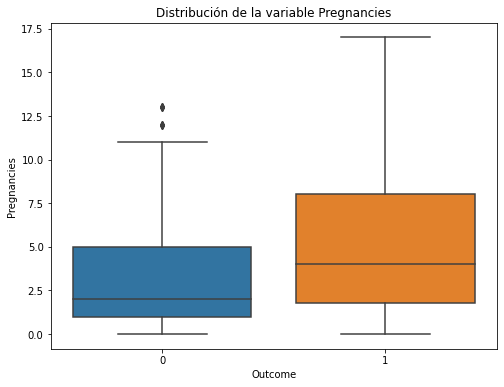

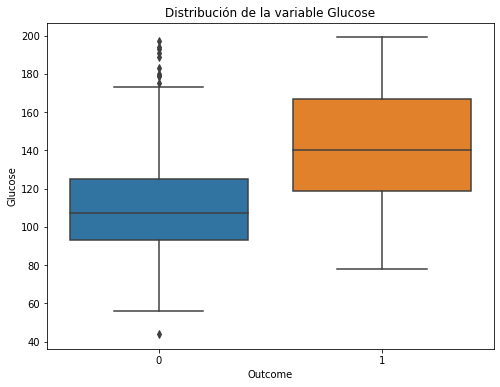

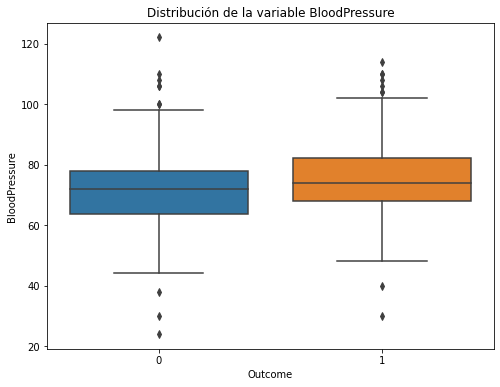

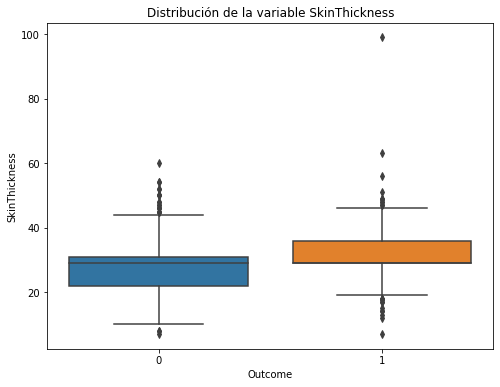

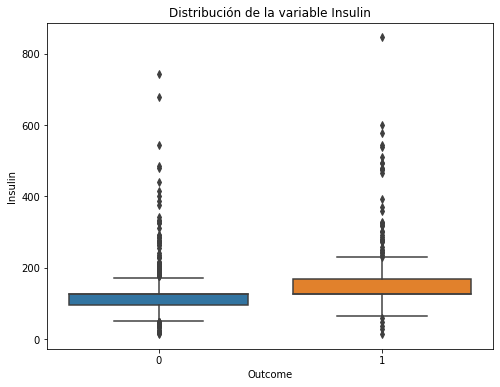

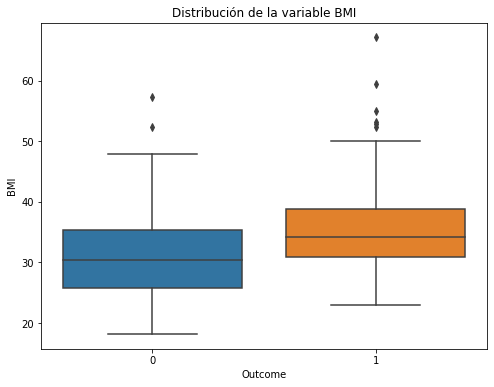

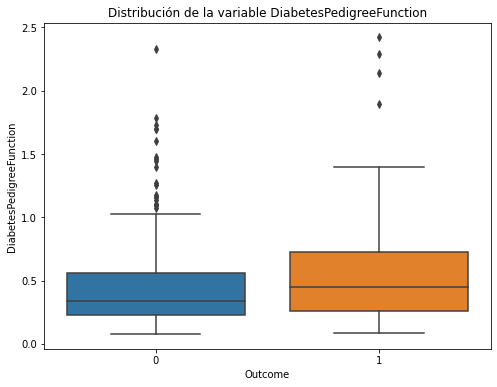

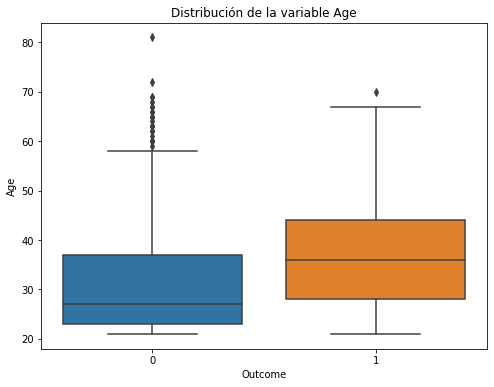

In [15]:
data_columns=data.drop(columns='Outcome')
columns_to_plot = data_columns.columns


for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.xlabel('Outcome')
    plt.title(f"Distribución de la variable {column}");

>Vemos que las varias de las variables presentan outliers que deberemos considerar eliminar o no dependiendo de como afecte a la variable de salida. Además, se observa que:

1. Parece que las personas con diabetes tienen más embarazos, o que las embarazadas tienen mas diabetes, esto puede explicarse tambien porque puede aparecer diabetes gestacional.
2. Las personas con diabetes parecen tener más glucosa en sangre, algo coherente con la bibliografia de esa enfermedad.
3. La presión en sangre es más o menos igual en personas con diabetes que personas que sin diabetes.
4. El grosor de la piel también es parecido.
5. El nivel de insulina, tienen muchisimos outliers, la mayoria con niveles absolutamente desorbitados teniendo en cuenta que en una persona sin diabetes, 2 h despues de comer suele tener <140mg/dL de insulina en sangre, CON diabetes <180mg/dL. O estos datos se han tomado a personas que se han pinchado despues de visitar la fabrica de Willy Wonka o no se explica.
6. El BMI parece ser mayor en personas con diabetes, lo que concuerda con la bibliografia al respecto
7. El diabetes pedigree function es mayor en personas con diabetes que sin diabetes, lo cual al tener un componente genetico es coherente.
8. Las personas más mayores parecen tener más diabetes, esto seria mas acorde a una diabetes tipo 2 ya que es la diabetes que se detecta mas en mayores de 40 años, sobre todo por habitos insanos, falta de deporte o dietas mal equilibradas. 
9. Los datos estarian mas completos si se hicieran distinciones de tipos de diabetes, porque por ejemplo la diabetes tipo 1, aparece en dos franjas de edades, de 4-7 años y de 10-14. Franja de edad que ni siquiera esta reflejada en los datos.

Todas estas diferencias nos permiten usar estos datos para nuestro modelo.


**Usa un countplot para hacerte una idea de cuántos hijos suelen tener las pacientes.**

Text(0, 0.5, 'Nº de pacientes')

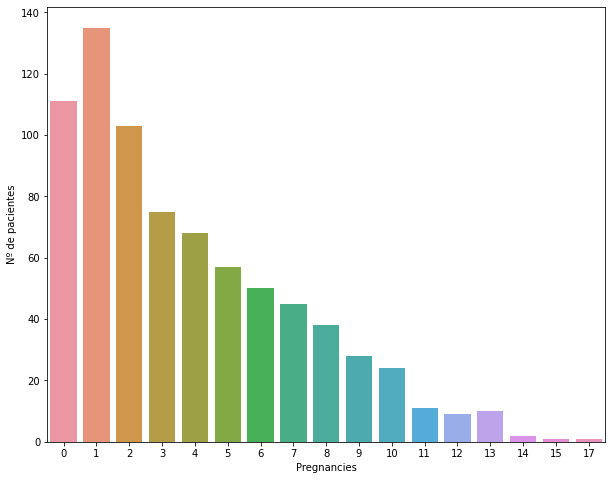

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='Pregnancies',data=data)
plt.ylabel('Nº de pacientes')

**Usa un pairplot para mostrar la relación entre las diferentes pares de variables numéricas diferenciando si padecen o no diabetes.**

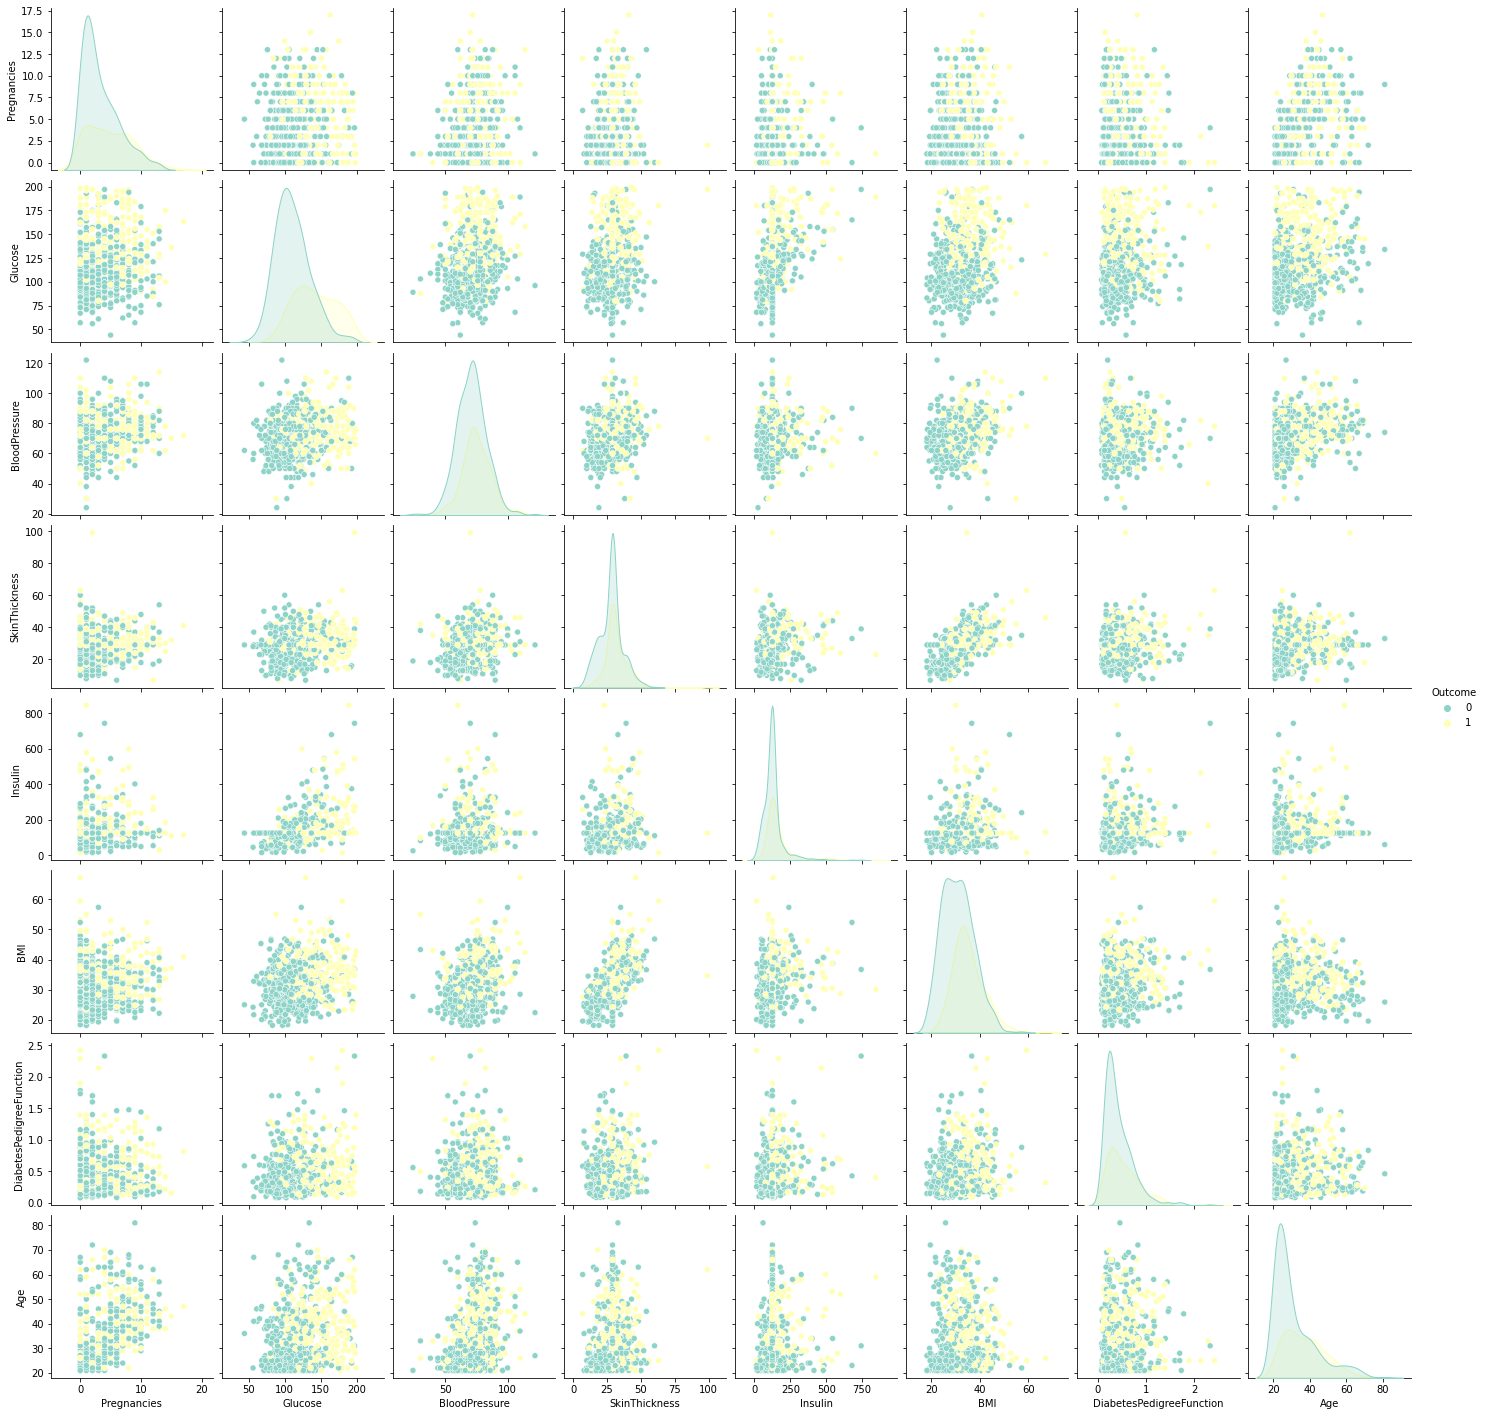

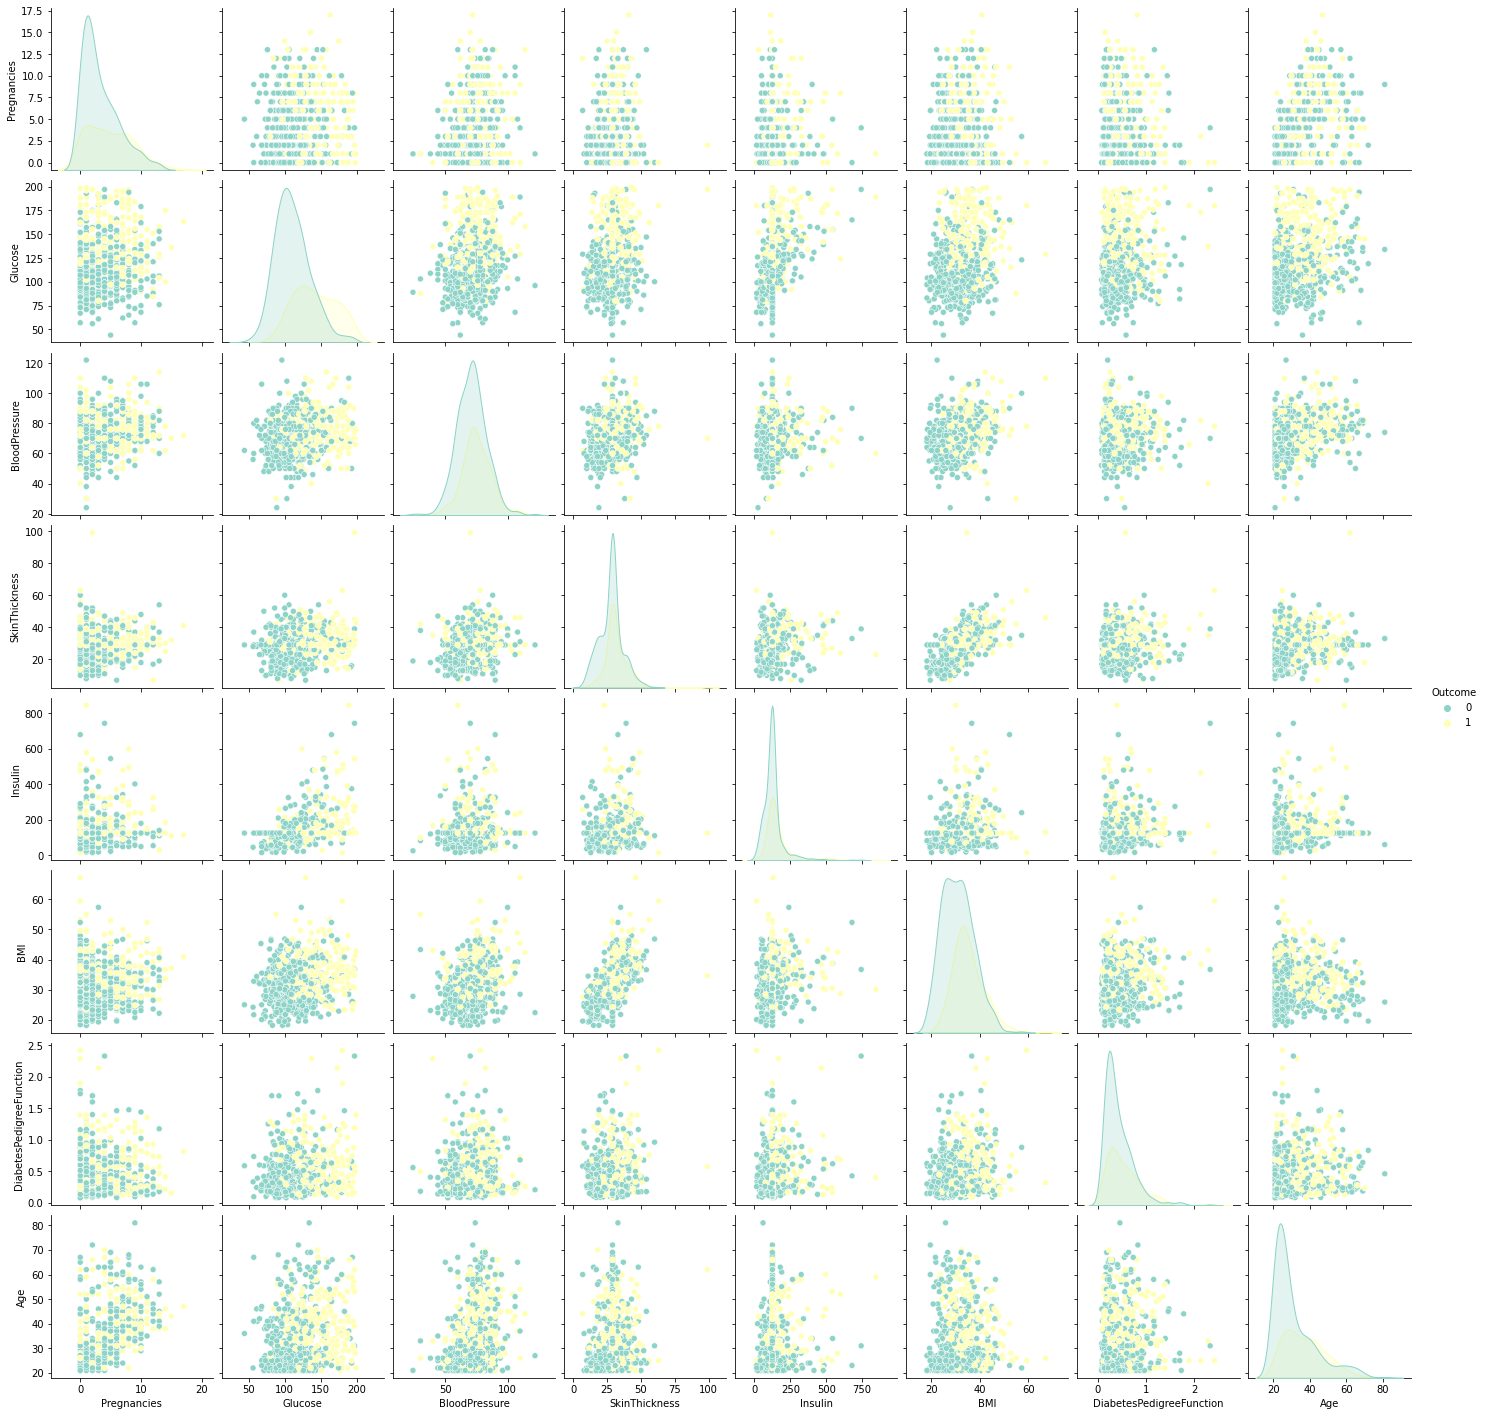

In [17]:
sns.pairplot(hue='Outcome',data=data,palette='Set3')
#Tambien se puede hacer asi:
sns.pairplot(data, hue='Outcome', palette='Set3')

**Crea una nueva variable llamada `BMI_cat` de modo que asignes a cada paciente la categoría que le corresponde en función de su índice de masa corporal. A continuación te dejamos la tabla con las equivalencias.**

| Category          | Range             |
|-------------------|-------------------|
|   **Underweight** |       < 18.5      |
| **Normal weight** | >= 18.5 & <= 24.9 |
|    **Overweight** |  >= 25 & <= 29.9  |
|       **Obesity** |       >= 30       |

In [18]:
# Creamos la nueva variable
def get_BMI(BMI):
    #data['BMI_cat']= ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
    if BMI<=18.5:
        return 'Underweight'
    elif BMI>= 18.5 and BMI<= 24.9:
        return 'Normal weight'
    elif BMI>= 25 and BMI<= 29.9:
        return 'Overweight'
    elif BMI>= 30:
        return 'Obesity'
        
data['BMI_cat']= data['BMI'].apply(get_BMI)

In [19]:
# Mostramos un recuento
data['BMI_cat'].value_counts()

Obesity          483
Overweight       179
Normal weight    102
Underweight        4
Name: BMI_cat, dtype: int64

**¿Hay algo del recuento anterior que te llame la atención?**

>Sorprende que solo 4 personas estén en underweight y la mayoria tengan sobrepeso u obesidad, pero siendo EEUU no nos sorprende (no son famosos por su dieta variada y equilibrada).

**Haz el mismo recuento pero ahora en función de la variable a predecir.**

In [20]:
# Para las pacientes sanas
sanos= data[data['Outcome']== 0]
sanos['BMI_cat'].value_counts()


Obesity          262
Overweight       139
Normal weight     95
Underweight        4
Name: BMI_cat, dtype: int64

In [21]:
# Para las pacientes diabéticas
diabeticos= data[data['Outcome']== 1]
diabeticos['BMI_cat'].value_counts()

Obesity          221
Overweight        40
Normal weight      7
Name: BMI_cat, dtype: int64

**Crea una nueva característica llamada `Glucose_cat` de modo que asignes a cada paciente la categoría que le corresponde en función de su nivel de glucosa tras la prueba de tolerancia oral. A continuación te dejamos la tabla con las equivalencias.**

| Category          | Range             |
|-------------------|-------------------|
|   **Normal** |       < 140 mlg/dl      |
| **Prediabetes** | >= 140 mg/dl & < 199 mg/dl |
|    **Diabetes** |  >= 200 mg/dl  |

In [22]:
# Crea la nueva variable
def glucose_funcion(Glucose):
    if Glucose< 140:
        return 'Normal'
    elif  Glucose >= 140 and Glucose <= 199:
        return 'Prediabetes'
    elif Glucose>= 200:
        return 'Diabetes'
       
data['Glucose_cat']= data['Glucose'].apply(glucose_funcion)

#el enunciado esta mal, en prediabetes deberia ser <= no < o 200, no 199

In [23]:
# Muestra un recuento
data['Glucose_cat'].value_counts()

Normal         571
Prediabetes    197
Name: Glucose_cat, dtype: int64

**¿Qué observas? ¿Cuántas de las pacientes diagnosticadas de diabetes tienen tras la prueba niveles de glucosa normales y cuántas de prediabetes? ¿A qué podría deberse esto?**

>Como vemos, 571 personas tienen niveles de glucosa normales mientras que 197 son diagnosticadas como prediabetes. Este cambio podría deberse a que las personas diagnosticadas como Normal se hayan inyectado insulina hace poco y se les haya regulado la glucosa en sangre. Por otro lado, puede ser que las personas con Prediabetes acaben de comer y, por ello, la glucosa en sangre esté algo alta. 

In [24]:
# Pacientes diabéticas con niveles normales de glucosa
normales_diabeticas= data[(data['Glucose_cat']== 'Normal') & (data['Outcome']== 1)]

print('Pacientes diabéticas con niveles normales de glucosa:', normales_diabeticas.shape[0])


Pacientes diabéticas con niveles normales de glucosa: 133


In [25]:
# Pacientes diabéticas con niveles de glucosa indicativos de prediabetes
prediabeticas_diabeticas= data[(data['Glucose_cat']== 'Prediabetes') & (data['Outcome']== 1)]
print('Pacientes diabéticas con niveles prediabeticos de glucosa:', prediabeticas_diabeticas.shape[0])

Pacientes diabéticas con niveles prediabeticos de glucosa: 135


**Crea una nueva característica llamada `BP_cat` de modo que asignes a cada paciente la categoría que le corresponde en función de su presión arterial. La tabla con las equivalencias sería la siguiente.**

| Category          | Range             |
|-------------------|-------------------|
|   **Normal** |       < 80      |
| **Stage 1 HT** | >= 80 & =< 89 |
| **Stage 2 HT** | >= 90 & =< 119 |
|    **HT crisis** |  >= 120  |

In [26]:
# Crea la nueva variable
def BP_funcion(BloodPressure):
    if BloodPressure< 80:
        return 'Normal'
    elif  BloodPressure >= 80 and BloodPressure <= 89:
        return 'Stage 1 HT'
    elif  BloodPressure >= 90 and BloodPressure <= 119:
        return 'Stage 2 HT'
    elif BloodPressure >= 120:
        return 'HT crisis'
       
data['BP_cat']= data['BloodPressure'].apply(BP_funcion)

In [27]:
# Muestra un recuento
data['BP_cat'].value_counts()

Normal        563
Stage 1 HT    145
Stage 2 HT     59
HT crisis       1
Name: BP_cat, dtype: int64

**¿Qué porcentaje de pacientes con y sin diabetes tienen la tensión más alta de lo normal?**

In [28]:
presion_alta_si_diabetes= data[(data['BP_cat']!= 'Normal') & (data['Outcome']== 1)]

#diabeticas.shape[0]
print('Pacientes diabéticas con presion mas alta de lo normal:', 100*(presion_alta_si_diabetes.shape[0]/ diabeticos.shape[0]), '%')


Pacientes diabéticas con presion mas alta de lo normal: 33.582089552238806 %


In [29]:
presion_alta_no_diabetes= data[(data['BP_cat']!= 'Normal') & (data['Outcome']==0)]


print('Pacientes no diabéticas con presion mas alta de lo normal:', 100*(presion_alta_no_diabetes.shape[0]/ (len(data)-diabeticos.shape[0])), '%')


Pacientes no diabéticas con presion mas alta de lo normal: 23.0 %


**Crea una nueva característica llamada `Insulin_cat` de modo que se considera que aquellos pacientes con una insulina en sangre menor o igual a 150 $\mu$U/ml están dentro de los valores normales.**

In [30]:
# Crea la nueva variable
def Insulin_funcion(Insulin):
    if Insulin <= 150:
        return 'Normal'
    elif  Insulin >150:
        return 'Abnormal'
   
data['Insulin_cat']= data['Insulin'].apply(Insulin_funcion)

In [31]:
# Muestra un recuento
data['Insulin_cat'].value_counts()



Normal      615
Abnormal    153
Name: Insulin_cat, dtype: int64

**¿Qué porcentaje de pacientes con y sin diabetes tienen unos valores de insulina anormales? ¿Cómo podemos interpretar esto?**

In [32]:
insulin_si_diabetes= data[(data['Insulin_cat']== 'Abnormal') & (data['Outcome']== 1)]
print('Un',round((insulin_si_diabetes['Insulin_cat'].shape[0]/diabeticos.shape[0])*100,2), '% de las pacientes con diabetes tienen valores anormales de insulina ')


Un 29.48 % de las pacientes con diabetes tienen valores anormales de insulina 


In [33]:
insulin_no_diabetes= data[(data['Insulin_cat']== 'Abnormal') & (data['Outcome']== 0)]
print('Un', round((insulin_no_diabetes['Insulin_cat'].shape[0]/(len(data)-diabeticos.shape[0]))*100,2), '% de las pacientes sin diabetes tienen valores anormales de insulina ')


Un 14.8 % de las pacientes sin diabetes tienen valores anormales de insulina 


**La edad es un factor importante a la hora de analizar muchas de estas variables. Así, por ejemplo, es más probable que a medida que aumenta la edad de la paciente aumente también el número de embarazos previos o el BMI. Te pedimos que normalices las variables `Pregnancies`, `BMI`, `SkinThickness`, `Insulin` y `Glucose` y crees una nueva característica por cada una de ellas.**

In [34]:
data['PregnanciesAge'] = data['Pregnancies'] / data['Age']
data['BMIAge'] = data['BMI'] / data['Age']
data['SkinAge'] = data['SkinThickness'] / data['Age']
data['GlucoseAge'] = data['Glucose'] / data['Age']
data['InsulinAge'] = data['Insulin'] / data['Age']

**También existe una importante relación entre los niveles de glucosa e insulina en sangre. Crea una nueva variable que multiplique ambos valores.**

In [35]:
# insulin_glucose
data['insulin_glucose']= data['Insulin']*data['Glucose']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Glucose_cat,BP_cat,Insulin_cat,PregnanciesAge,BMIAge,SkinAge,GlucoseAge,InsulinAge,insulin_glucose
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obesity,Prediabetes,Normal,Normal,0.120000,0.672000,0.700000,2.960000,2.500000,18500.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Normal,Normal,Normal,0.032258,0.858065,0.935484,2.741935,4.032258,10625.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal weight,Prediabetes,Normal,Normal,0.250000,0.728125,0.906250,5.718750,3.906250,22875.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,Normal,0.047619,1.338095,1.095238,4.238095,4.476190,8366.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity,Normal,Normal,Abnormal,0.000000,1.306061,1.060606,4.151515,5.090909,23016.0


**Para poder pasarle los datos a algunos de los algoritmos que vamos a usar necesitamos convertir todas las variables categóricas a numéricas. Usa la función `get_dummies()` para realizar el _one-hot encoding_ de las variables categóricas.**

In [36]:
data= pd.get_dummies(data,drop_first=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregnanciesAge,...,InsulinAge,insulin_glucose,BMI_cat_Obesity,BMI_cat_Overweight,BMI_cat_Underweight,Glucose_cat_Prediabetes,BP_cat_Normal,BP_cat_Stage 1 HT,BP_cat_Stage 2 HT,Insulin_cat_Normal
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0.120000,...,2.500000,18500.0,1,0,0,1,1,0,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0.032258,...,4.032258,10625.0,0,1,0,0,1,0,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0.250000,...,3.906250,22875.0,0,0,0,1,1,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0.047619,...,4.476190,8366.0,0,1,0,0,1,0,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0.000000,...,5.090909,23016.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0.158730,...,2.857143,18180.0,1,0,0,0,1,0,0,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,0.074074,...,4.629630,15250.0,1,0,0,0,1,0,0,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0.166667,...,3.733333,13552.0,0,1,0,0,1,0,0,1
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1,0.021277,...,2.659574,15750.0,1,0,0,0,1,0,0,1


**Calcula los índices de correlación entre las variables de nuestro conjunto de datos y represéntalas usando un mapa de calor. ¿Qué conclusiones sacas?**

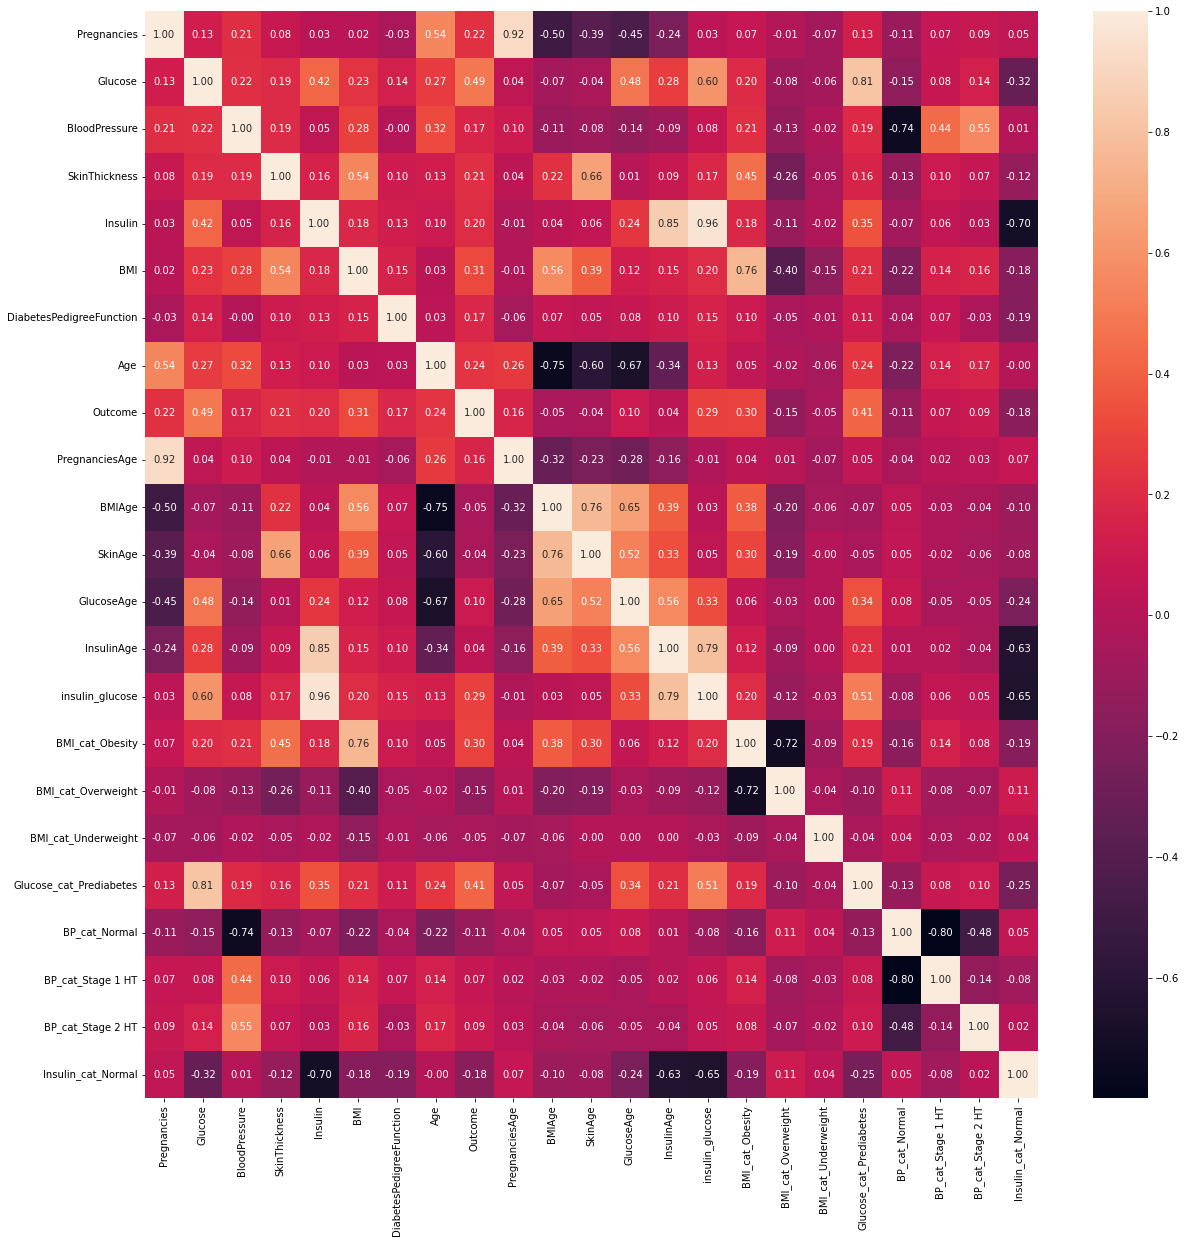

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente. Elimina las variables `BloodPressure` e `Insulin` para las que ya hemos creado su correspondiente variable categórica y no parecen tener una importante correlación con la variable de salida.**

In [38]:
X = data.drop(['BloodPressure','Insulin','Outcome'], axis=1)
y = data['Outcome']

**Divide el dataset en los conjuntos de entrenamiento y prueba en una proporción de 75/25. Usa `RANDOM_STATE` y estratifica la división en función de la variable de salida.**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

**Normaliza los datos de entrenamiento y prueba usando la función `StandardScaler()` de la librería Scikit-Learn.**

In [40]:
# Escala el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [41]:
# Recrea el dataset de entrenamiento con las columnas estandarizadas
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train.head()

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,PregnanciesAge,BMIAge,SkinAge,GlucoseAge,InsulinAge,insulin_glucose,BMI_cat_Obesity,BMI_cat_Overweight,BMI_cat_Underweight,Glucose_cat_Prediabetes,BP_cat_Normal,BP_cat_Stage 1 HT,BP_cat_Stage 2 HT,Insulin_cat_Normal
0,-0.877817,-1.390108,-2.072727,-0.343280,0.160307,-0.980244,-0.800612,0.811559,-1.182496,-0.223734,-0.595278,-0.860104,0.786115,-0.569331,-0.059028,-0.574677,0.614809,-0.485851,-0.298072,0.48312
1,-0.584872,-0.092805,-0.054694,-1.882723,1.057927,3.203371,-1.014562,-2.106208,-1.433630,-1.697979,-0.927249,-0.205381,-1.272078,-0.569331,-0.059028,-0.574677,0.614809,-0.485851,-0.298072,0.48312
2,1.758685,-0.225861,-0.054694,-0.002827,-0.622535,-0.310866,2.683707,0.044380,0.022945,-0.077342,-0.113179,-0.237873,0.786115,-0.569331,-0.059028,-0.574677,0.614809,-0.485851,-0.298072,0.48312
3,-0.877817,1.969575,1.402774,1.136953,2.311652,-0.980244,-0.800612,2.026733,2.457309,3.188332,2.951952,2.274316,0.786115,-0.569331,-0.059028,1.740107,0.614809,-0.485851,-0.298072,-2.06988
4,0.001017,-0.824617,-0.727372,-0.609722,-0.086906,-0.980244,0.849855,0.592828,0.226461,0.350574,0.394293,-0.384089,-1.272078,1.756447,-0.059028,-0.574677,0.614809,-0.485851,-0.298072,0.48312


In [42]:
# Escala el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

In [43]:
# Recrea el dataset de prueba con las columnas estandarizadas
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

**Entrena un clasificador `LogisticRegression` optimizando sus hiperparámetros. Usa `RANDOM_STATE` para que los resultados sean reproducibles.**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score


In [45]:
#Lo entrenamos de nuevo para guardar los mejores parametros del paso anterior

lr_params = {'C': [9.08, 10.08, 100.08,200.08],
             'max_iter': [100,200, 500, 1000]}

#Optimizar el clasificador
lr_grid = GridSearchCV(estimator=LogisticRegression(random_state=RANDOM_STATE),
                       param_grid=lr_params,
                       cv=3).fit(X_train, y_train)

#Mostrar los mejores parametros
lr_grid.best_estimator_.get_params()

{'C': 9.08,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
#mejores parametros
lr_grid.best_params_

{'C': 9.08, 'max_iter': 100}

In [47]:
#entrenado con los mejores parametros
lr_opt=LogisticRegression(C=9.08, max_iter=100, penalty='l2', random_state=RANDOM_STATE)


In [48]:
lr_opt.fit(X_train, y_train)

LogisticRegression(C=9.08, random_state=0)

In [49]:
Test_accuracy= lr_opt.score(X_test, y_test)
print ('Test accuracy:', Test_accuracy, '%')

Test accuracy: 0.7708333333333334 %


**Realiza las predicciones sobre el conjunto de prueba.**

In [50]:
y_pred_lr = lr_opt.predict(X_test)

**Calcula la matriz de confusión e imprime el informe de clasificación. ¿Qué opinas de los resultados obtenidos?**

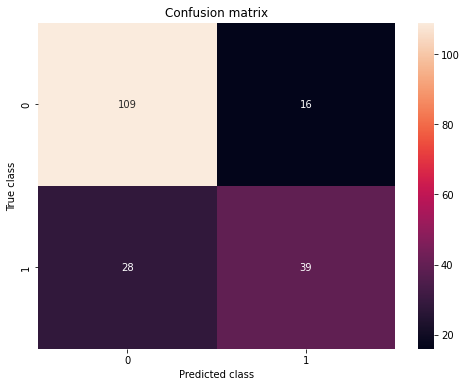

In [51]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [52]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       125
           1       0.71      0.58      0.64        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



> Vemos que el f1-score del valor **0** es bastante alto mientras que, para el valor **1** no tenemos tanta precisión en la predicción (58%). Además, la accuracy es bastante buena: 78%.

**Ahora entrena un clasificador `RandomForestClassifier` optimizando sus hiperparámetros para ver si conseguimos mejorar las métricas. Usa `RANDOM_STATE` para que los resultados sean reproducibles.**

In [63]:
#primera forma intentada
param_grid = { "criterion" : ["gini", "entropy"], 
              'n_estimators' :[100, 200, 500, 1000],
             'max_depth': [3, 5, 8, 10]}

# Optimiza el clasificador
rf_opt = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), 
                    param_grid,
                     cv=3).fit(X_train, y_train)

In [64]:
# Muestra los mejores parámetros
rf_opt.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}

In [65]:
# Entrena el clasificador con los parámetros óptimos
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=200,
                             max_depth=8)

In [89]:
a=rf.fit(X_train, y_train)

**Realiza las predicciones sobre el conjunto de prueba.**

In [68]:
y_pred = rf.predict(X_test)

**Calcula la matriz de confusión e imprime el informe de clasificación. ¿Qué diferencias observas con respecto al modelo anterior?**

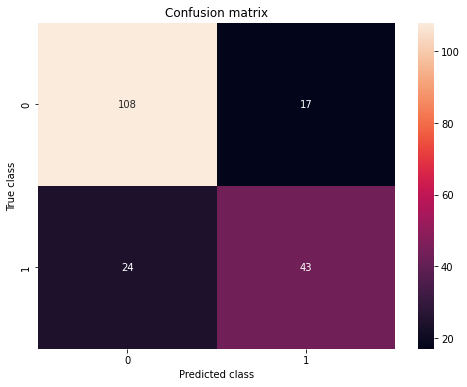

In [69]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [70]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.72      0.64      0.68        67

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



> En este caso, las predicciones son mejores ya que el f1-score ha aumentado de valor.

**Muestra un gráfico con la importancia de las características.**

<Figure size 2880x720 with 0 Axes>

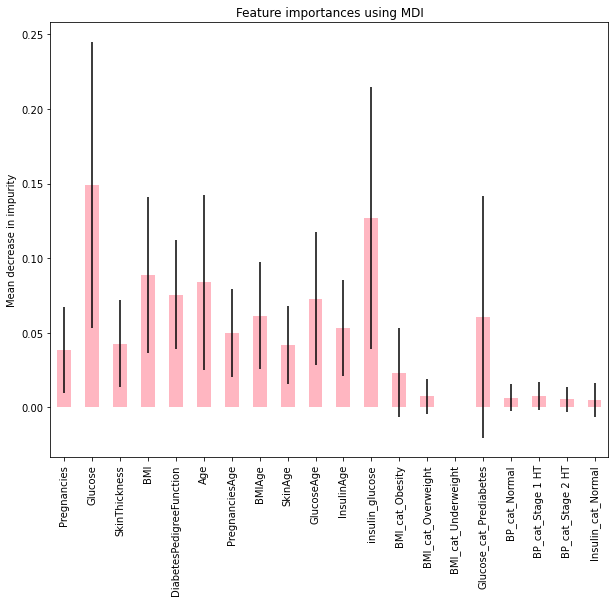

In [85]:
plt.figure(figsize=(40,10))

# Muestra la importancia de las características

importances=rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(10,8))
forest_importances.plot.bar(yerr=std, ax=ax,color='LightPink')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.show()

**Muestra el árbol de decisión del estimador número 10 de random forest entrenado y guarda la imagen.**

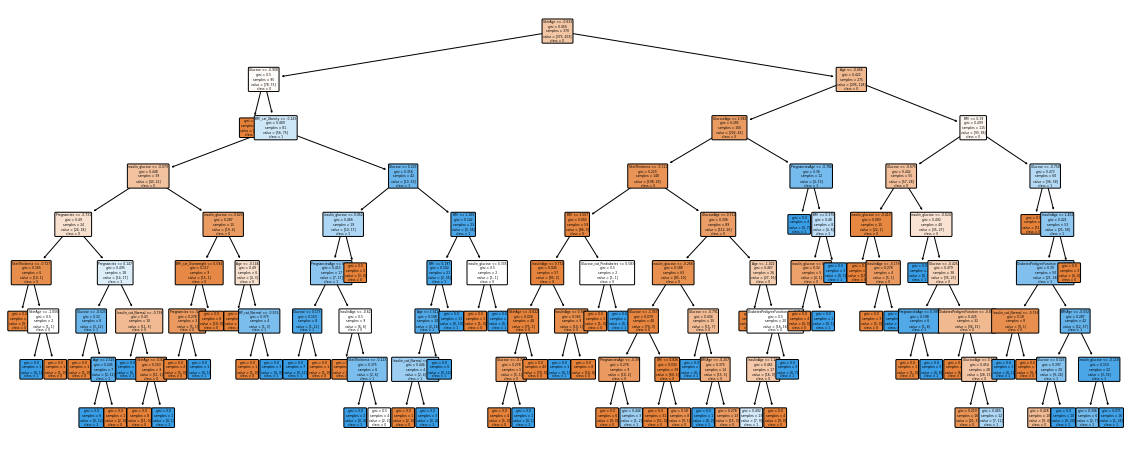

<Figure size 432x288 with 0 Axes>

In [103]:
n = 10
plt.figure(figsize=(20, rf.estimators_[n].get_depth() * 1))

plot_tree(rf.estimators_[n],
               feature_names=X.columns,
               class_names=['0', '1'],
               filled=True,
               rounded=True,
               fontsize=3)
plt.show()
plt.savefig(f'Tree10.png')

**Imprime un informe de texto con las reglas de decisión del mismo estimador del que acabas de visualizar el árbol.**

In [104]:
# Crea un informe de texto que muestra las reglas del árbol de decisión
print((export_text(rf.estimators_[n], feature_names=list(X.columns))))

|--- SkinAge <= -0.63
|   |--- Glucose <= -0.91
|   |   |--- class: 0.0
|   |--- Glucose >  -0.91
|   |   |--- BMI_cat_Obesity <= -0.24
|   |   |   |--- insulin_glucose <= -0.08
|   |   |   |   |--- Pregnancies <= -0.73
|   |   |   |   |   |--- SkinThickness <= -0.73
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- SkinThickness >  -0.73
|   |   |   |   |   |   |--- SkinAge <= -1.06
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- SkinAge >  -1.06
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Pregnancies >  -0.73
|   |   |   |   |   |--- Pregnancies <= 0.15
|   |   |   |   |   |   |--- Glucose <= -0.63
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Glucose >  -0.63
|   |   |   |   |   |   |   |--- Age <= 2.32
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Age >  2.32
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Pregnancies >  0.15
|   |   | 

**Para este tipo de problema, ¿qué métrica sería más apropiado usar, una curva ROC o una curva precisión-sensibilidad? Justifica tu respuesta y crea la visualización correspondiente para el modelo de random forest.**

> Las curvas de precisión sensibilidad se deben utilizar cuando existe un notable desbalance entre el número de observaciones de cada clase, por lo que es la mejor métrica.

In [114]:
# Calcula las probabilidades de predicción
y_prob = rf.predict_proba(X_test)[:, 1]


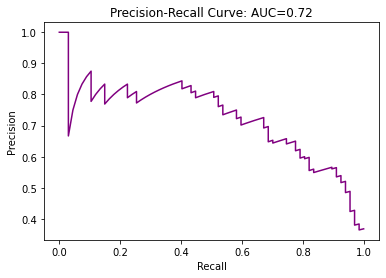

In [118]:
# Genera la curva


#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
vauc = auc(recall, precision)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title(f'Precision-Recall Curve: AUC={round(vauc,2)}')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()